In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

train_file_path = '/content/drive/MyDrive/small-PhoMT/small-train.json'
dev_file_path = '/content/drive/MyDrive/small-PhoMT/small-dev.json'
test_file_path = '/content/drive/MyDrive/small-PhoMT/small-test.json'

print('Tập train:')
df_train = pd.read_json(train_file_path)
display(df_train.head())

print('Tập dev:')
df_dev = pd.read_json(dev_file_path)
display(df_dev.head())

print('Tập test:')
df_test = pd.read_json(test_file_path)
display(df_test.head())

Tập train:


,english,vietnamese
0,It begins with a countdown .,Câu chuyện bắt đầu với buổi lễ đếm ngược .
1,"On August 14th , 1947 , a woman in Bombay goes...","Ngày 14 , tháng 8 , năm 1947 , gần nửa đêm , ở..."
2,"Across India , people hold their breath for th...","Cùng lúc , trên khắp đất Ấn , người ta nín thở..."
3,"And at the stroke of midnight , a squirming in...","Khi đồng hồ điểm thời khắc nửa đêm , một đứa t..."
4,"These events form the foundation of "" Midnight...","Những sự kiện này là nền móng tạo nên "" Những ..."


Tập dev:


,english,vietnamese
0,"﻿Hurricane Dorian , one of the most powerful s...","Vào chủ nhật ngày 1-9-2019 , cơn bão Dorian , ..."
1,Dorian is especially dangerous due to its slow...,Bão Dorian đặc biệt nguy hiểm vì nó di chuyển ...
2,"The storm passed by the Leeward Islands , Puer...","Khi đi qua quần đảo Leeward , Puerto Rico và q..."
3,The United States branch office continues to g...,Văn phòng chi nhánh Hoa Kỳ tiếp tục cập nhật t...
4,"At this time , there have been no reported inj...","Theo báo cáo đến thời điểm hiện tại , trong 46..."


Tập test:


,english,vietnamese
0,"Brother Albert Barnett and his wife , Sister S...","Anh Albert Barnett và chị Susan Barnett , thuộ..."
1,Severe storms ripped through parts of the sout...,"Ngày 11 và 12-1-2020 , những cơn bão lớn đã qu..."
2,"Two days of heavy rain , high winds , and nume...",Những trận mưa to và gió lớn trong suốt hai ng...
3,"Sadly , Brother Albert Barnett and his wife , ...","Đáng buồn là anh Albert Barnett 85 tuổi , và v..."
4,The United States branch also reports that at ...,Chi nhánh Hoa Kỳ cũng cho biết có ít nhất bốn ...


Tổng số cặp câu trong tập train: 20000
                                             english  \
0                       It begins with a countdown .   
1  On August 14th , 1947 , a woman in Bombay goes...   
2  Across India , people hold their breath for th...   
3  And at the stroke of midnight , a squirming in...   
4  These events form the foundation of " Midnight...   

                                          vietnamese  
0         Câu chuyện bắt đầu với buổi lễ đếm ngược .  
1  Ngày 14 , tháng 8 , năm 1947 , gần nửa đêm , ở...  
2  Cùng lúc , trên khắp đất Ấn , người ta nín thở...  
3  Khi đồng hồ điểm thời khắc nửa đêm , một đứa t...  
4  Những sự kiện này là nền móng tạo nên " Những ...  

Thống kê độ dài câu Tiếng Anh trong tập train:
count    20000.000000
mean        19.794350
std         13.620537
min          3.000000
25%         10.000000
50%         16.000000
75%         26.000000
max        164.000000
Name: len_en, dtype: float64

Thống kê độ dài câu Tiếng Việt trong tập

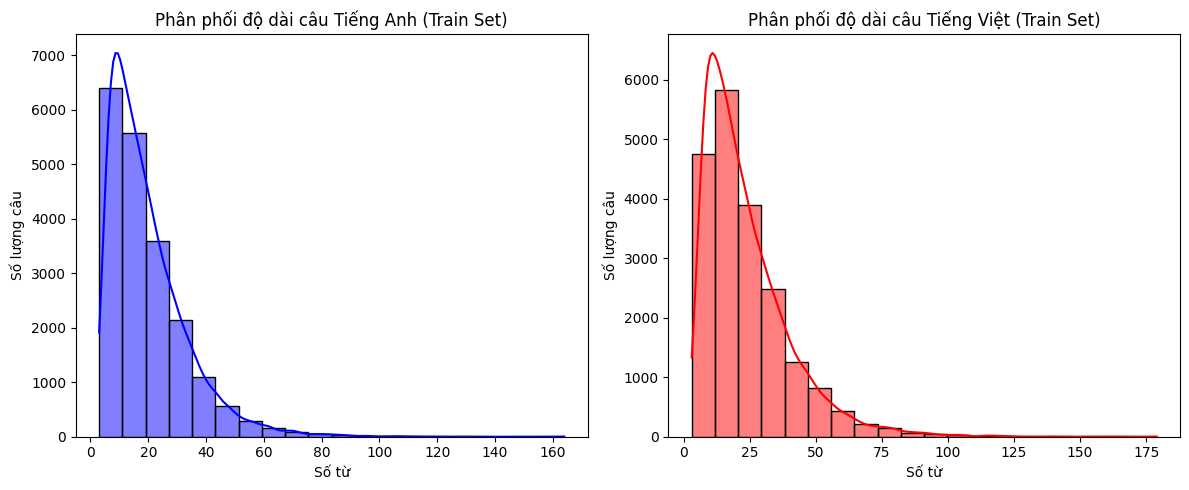

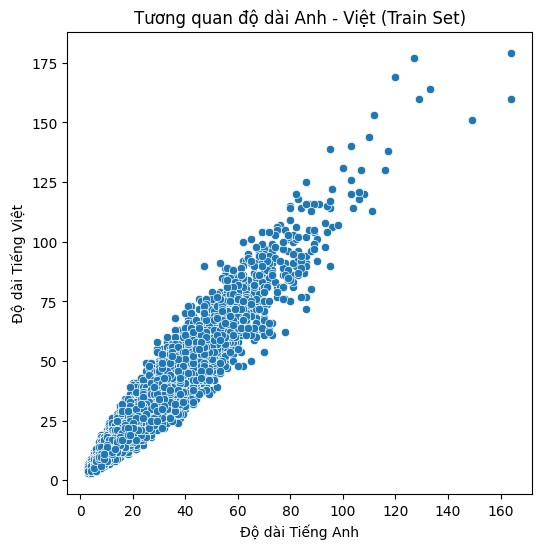

In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = df_train

# Thống kê cơ bản
print(f"Tổng số cặp câu trong tập train: {len(df)}")
print(df.head())

# Tính độ dài câu (theo số từ - word count đơn giản bằng cách tách khoảng trắng)
df['len_en'] = df['english'].apply(lambda x: len(str(x).split()))
df['len_vi'] = df['vietnamese'].apply(lambda x: len(str(x).split()))

# Thống kê mô tả
print("\nThống kê độ dài câu Tiếng Anh trong tập train:")
print(df['len_en'].describe())
print("\nThống kê độ dài câu Tiếng Việt trong tập train:")
print(df['len_vi'].describe())

# Trực quan hóa phân phối độ dài
plt.figure(figsize=(12, 5))

# Histogram Tiếng Anh
plt.subplot(1, 2, 1)
sns.histplot(df['len_en'], kde=True, color='blue', bins=20)
plt.title('Phân phối độ dài câu Tiếng Anh (Train Set)')
plt.xlabel('Số từ')
plt.ylabel('Số lượng câu')

# Histogram Tiếng Việt
plt.subplot(1, 2, 2)
sns.histplot(df['len_vi'], kde=True, color='red', bins=20)
plt.title('Phân phối độ dài câu Tiếng Việt (Train Set)')
plt.xlabel('Số từ')
plt.ylabel('Số lượng câu')

plt.tight_layout()
plt.show()

# Kiểm tra tương quan độ dài
plt.figure(figsize=(6, 6))
sns.scatterplot(x=df['len_en'], y=df['len_vi'])
plt.title('Tương quan độ dài Anh - Việt (Train Set)')
plt.xlabel('Độ dài Tiếng Anh')
plt.ylabel('Độ dài Tiếng Việt')
plt.show()

###Bài 1

In [4]:
!pip install unidecode
!pip install rouge-score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence

import json
import random
import numpy as np
from collections import Counter
from unidecode import unidecode
from rouge_score import rouge_scorer

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=51d8beae17f8ae7127519c3c1fcfb8b5c3ca76462c46e39038995fe98688eadf
  Stored in directory: /root/.cache/pip/wheels/85/9d/af/01feefbe7d55ef5468796f0c68225b6788e85d9d0a281e7a70
Successfully built rouge-score


In [5]:
def load_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    return [(item['english'].strip(), item['vietnamese'].strip()) for item in data]

train_pairs = load_data('/content/drive/MyDrive/small-PhoMT/small-train.json')
dev_pairs   = load_data('/content/drive/MyDrive/small-PhoMT/small-dev.json')
test_pairs  = load_data('/content/drive/MyDrive/small-PhoMT/small-test.json')

print(f"Train: {len(train_pairs)} pairs")
print(f"Dev:   {len(dev_pairs)} pairs")
print(f"Test:  {len(test_pairs)} pairs")

print("EN:", train_pairs[0][0])
print("VI:", train_pairs[0][1])

Train: 20000 pairs
Dev:   2000 pairs
Test:  2000 pairs
EN: It begins with a countdown .
VI: Câu chuyện bắt đầu với buổi lễ đếm ngược .


In [6]:
SOS_TOKEN = '<sos>'
EOS_TOKEN = '<eos>'
PAD_TOKEN = '<pad>'
UNK_TOKEN = '<unk>'

class Vocab:
    def __init__(self, pairs, min_freq=2):
        counter_en = Counter()
        counter_vi = Counter()
        for en, vi in pairs:
            counter_en.update(en.lower().split())
            counter_vi.update(vi.lower().split())

        self.itos_en = {0: PAD_TOKEN, 1: UNK_TOKEN, 2: SOS_TOKEN, 3: EOS_TOKEN}
        self.stoi_en = {v: k for k, v in self.itos_en.items()}
        idx = 4
        for word, freq in counter_en.items():
            if freq >= min_freq:
                self.itos_en[idx] = word
                self.stoi_en[word] = idx
                idx += 1

        self.itos_vi = {0: PAD_TOKEN, 1: UNK_TOKEN, 2: SOS_TOKEN, 3: EOS_TOKEN}
        self.stoi_vi = {v: k for k, v in self.itos_vi.items()}
        idx = 4
        for word, freq in counter_vi.items():
            if freq >= min_freq:
                self.itos_vi[idx] = word
                self.stoi_vi[word] = idx
                idx += 1

    def __len_en__(self):
        return len(self.itos_en)

    def __len_vi__(self):
        return len(self.itos_vi)

vocab = Vocab(train_pairs, min_freq=2)

print(f"Vocab EN: {len(vocab.itos_en)} tokens")
print(f"Vocab VI: {len(vocab.itos_vi)} tokens")

Vocab EN: 10084 tokens
Vocab VI: 4312 tokens


In [7]:
class TranslationDataset(Dataset):
    def __init__(self, pairs, vocab):
        self.pairs = pairs
        self.vocab = vocab

    def __len__(self):
        return len(self.pairs)

    def __getitem__(self, idx):
        en, vi = self.pairs[idx]
        en_ids = [vocab.stoi_en.get(w.lower(), vocab.stoi_en[UNK_TOKEN]) for w in en.split()]
        vi_ids = [vocab.stoi_vi.get(w.lower(), vocab.stoi_vi[UNK_TOKEN]) for w in vi.split()]

        en_ids = [vocab.stoi_en[SOS_TOKEN]] + en_ids + [vocab.stoi_en[EOS_TOKEN]]
        vi_ids = [vocab.stoi_vi[SOS_TOKEN]] + vi_ids + [vocab.stoi_vi[EOS_TOKEN]]

        return torch.tensor(en_ids), torch.tensor(vi_ids)

def collate_fn(batch):
    en_batch, vi_batch = zip(*batch)
    en_batch = pad_sequence(en_batch, padding_value=vocab.stoi_en[PAD_TOKEN], batch_first=True)
    vi_batch = pad_sequence(vi_batch, padding_value=vocab.stoi_vi[PAD_TOKEN], batch_first=True)
    return en_batch, vi_batch

BATCH_SIZE = 64
train_dataset = TranslationDataset(train_pairs, vocab)
dev_dataset   = TranslationDataset(dev_pairs, vocab)
test_dataset  = TranslationDataset(test_pairs, vocab)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
dev_loader   = DataLoader(dev_dataset,   batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)
test_loader  = DataLoader(test_dataset,  batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)

In [8]:
class Encoder(nn.Module):
    def __init__(self, vocab_size, emb_dim=256, hidden_dim=256, n_layers=3, dropout=0.5):
        super().__init__()
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim

        self.embedding = nn.Embedding(vocab_size, emb_dim, padding_idx=0)
        self.lstm = nn.LSTM(emb_dim, hidden_dim, n_layers,
                            dropout=dropout, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_dim * 2, hidden_dim)

    def forward(self, src):
        embedded = self.embedding(src)
        outputs, (hidden, cell) = self.lstm(embedded)

        hidden = torch.cat((hidden[-2, :, :], hidden[-1, :, :]), dim=1)
        cell = torch.cat((cell[-2, :, :], cell[-1, :, :]), dim=1)

        hidden = torch.tanh(self.fc(hidden))
        cell = torch.tanh(self.fc(cell))

        hidden = hidden.unsqueeze(0).repeat(self.n_layers, 1, 1)
        cell = cell.unsqueeze(0).repeat(self.n_layers, 1, 1)

        return hidden, cell

class Decoder(nn.Module):
    def __init__(self, vocab_size, emb_dim=256, hidden_dim=256, n_layers=3, dropout=0.5):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, emb_dim, padding_idx=0)
        self.lstm = nn.LSTM(emb_dim, hidden_dim, n_layers, dropout=dropout, batch_first=True)
        self.fc_out = nn.Linear(hidden_dim, vocab_size)

    def forward(self, input_token, hidden, cell):
        input_token = input_token.unsqueeze(1)
        embedded = self.embedding(input_token)

        output, (hidden, cell) = self.lstm(embedded, (hidden, cell))

        prediction = self.fc_out(output.squeeze(1))
        return prediction, hidden, cell

class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, src, trg, teacher_forcing_ratio=0.5):
        batch_size = src.shape[0]
        trg_len = trg.shape[1]
        trg_vocab_size = len(vocab.itos_vi)

        outputs = torch.zeros(batch_size, trg_len, trg_vocab_size).to(device)

        hidden, cell = self.encoder(src)

        input_token = trg[:, 0]

        for t in range(1, trg_len):
            output, hidden, cell = self.decoder(input_token, hidden, cell)
            outputs[:, t, :] = output

            teacher_force = random.random() < teacher_forcing_ratio
            top1 = output.argmax(1)
            input_token = trg[:, t] if teacher_force else top1

        return outputs

# Khởi tạo mô hình
enc = Encoder(len(vocab.itos_en), emb_dim=256, hidden_dim=256, n_layers=3, dropout=0.5).to(device)
dec = Decoder(len(vocab.itos_vi), emb_dim=256, hidden_dim=256, n_layers=3, dropout=0.5).to(device)
model = Seq2Seq(enc, dec).to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss(ignore_index=vocab.stoi_vi[PAD_TOKEN])

In [9]:
def train_epoch(model, loader, optimizer, criterion):
    model.train()
    epoch_loss = 0
    for src, trg in loader:
        src, trg = src.to(device), trg.to(device)

        optimizer.zero_grad()
        output = model(src, trg)

        output_dim = output.shape[-1]
        output = output[:, 1:, :].contiguous().view(-1, output_dim)
        trg = trg[:, 1:].contiguous().view(-1)

        loss = criterion(output, trg)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()

        epoch_loss += loss.item()
    return epoch_loss / len(loader)

N_EPOCHS = 20

def validate(model, loader, criterion, teacher_forcing_ratio=0.0):
    model.eval()
    epoch_loss = 0
    with torch.no_grad():
        for src, trg in loader:
            src, trg = src.to(device), trg.to(device)

            output = model(src, trg, teacher_forcing_ratio=teacher_forcing_ratio)

            output_dim = output.shape[-1]
            output = output[:, 1:, :].contiguous().view(-1, output_dim)
            trg = trg[:, 1:].contiguous().view(-1)

            loss = criterion(output, trg)
            epoch_loss += loss.item()
    return epoch_loss / len(loader)

In [10]:
import copy
from rouge_score import rouge_scorer

scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)

def evaluate_rouge_l(model, pairs, vocab, device, max_len=100):
    model.eval()
    scores = []

    with torch.no_grad():
        for en_sent, vi_ref in pairs:
            # Tokenize source
            tokens = en_sent.lower().split()
            src_ids = [vocab.stoi_en['<sos>']]
            for t in tokens:
                src_ids.append(vocab.stoi_en.get(t, vocab.stoi_en['<unk>']))
            src_ids.append(vocab.stoi_en['<eos>'])

            src_tensor = torch.LongTensor(src_ids).unsqueeze(0).to(device)

            # Encode
            if hasattr(model, 'encoder'):
                if hasattr(model.encoder, 'forward'):
                    if len(model.encoder.forward(src_tensor)) == 2:
                        hidden, cell = model.encoder(src_tensor)
                        encoder_outputs = None
                    else:
                        encoder_outputs, hidden, cell = model.encoder(src_tensor)
                else:
                    hidden, cell = model.encoder(src_tensor)
                    encoder_outputs = None
            else:
                hidden, cell = model.encoder(src_tensor)
                encoder_outputs = None

            # Decode greedy
            input_token = torch.LongTensor([vocab.stoi_vi['<sos>']]).to(device)
            predicted_ids = []

            for _ in range(max_len):
                if hasattr(model, 'decoder'):
                    if encoder_outputs is not None:
                        output, hidden, cell, _ = model.decoder(input_token, hidden, cell, encoder_outputs)
                    else:
                        output, hidden, cell = model.decoder(input_token, hidden, cell)
                else:
                    output, hidden, cell = model.decoder(input_token, hidden, cell)

                pred_token = output.argmax(1).item()
                if pred_token == vocab.stoi_vi['<eos>']:
                    break
                predicted_ids.append(pred_token)
                input_token = output.argmax(1)

            # Convert to text
            hyp = ' '.join([vocab.itos_vi[idx] for idx in predicted_ids if idx not in [vocab.stoi_vi['<sos>'], vocab.stoi_vi['<pad>']]])
            score = scorer.score(vi_ref, hyp)['rougeL'].fmeasure
            scores.append(score)

    return sum(scores) / len(scores) if scores else 0.0

N_EPOCHS = 30
PATIENCE = 5
CHECK_EVERY = 3
DEV_SAMPLE_SIZE = 500

best_rouge = 0.0
best_model_state = None
patience_counter = 0


for epoch in range(1, N_EPOCHS + 1):
    # Train
    train_loss = train_epoch(model, train_loader, optimizer, criterion)

    # Validate (loss)
    val_loss = validate(model, dev_loader, criterion, teacher_forcing_ratio=0.0)

    print(f'Epoch {epoch}/{N_EPOCHS} '
          f'| Train Loss: {train_loss} '
          f'| Val Loss: {val_loss}')

    if epoch % CHECK_EVERY == 0:
        rouge_dev = evaluate_rouge_l(model, dev_pairs[:DEV_SAMPLE_SIZE], vocab, device)
        print(f"Dev ROUGE-L: {rouge_dev}")

        # Cập nhật best model
        if rouge_dev > best_rouge:
            best_rouge = rouge_dev
            best_model_state = copy.deepcopy(model.state_dict())
            patience_counter = 0
            print(f"Mô hình tốt nhất ROUGE-L dev: {best_rouge}")
        else:
            patience_counter += 1

        # Early stopping
        if patience_counter >= PATIENCE:
            break


if best_model_state is not None:
    model.load_state_dict(best_model_state)

test_rouge_l = evaluate_rouge_l(model, test_pairs, vocab, device)

print(f"ROUGE-L trên test set: {test_rouge_l}")
print(f"Best Dev ROUGE-L đạt được: {best_rouge}")

Epoch 1/30 | Train Loss: 6.212213790454803 | Val Loss: 6.237106829881668
Epoch 2/30 | Train Loss: 6.057847344456389 | Val Loss: 6.233043849468231
Epoch 3/30 | Train Loss: 5.915918312133692 | Val Loss: 6.235387101769447
Dev ROUGE-L: 0.13425556351762566
Mô hình tốt nhất ROUGE-L dev: 0.13425556351762566
Epoch 4/30 | Train Loss: 5.792744705090508 | Val Loss: 6.248462215065956
Epoch 5/30 | Train Loss: 5.709360878307598 | Val Loss: 6.226405426859856
Epoch 6/30 | Train Loss: 5.6431061863518375 | Val Loss: 6.2560814172029495
Dev ROUGE-L: 0.06493622894939
Epoch 7/30 | Train Loss: 5.593507274652061 | Val Loss: 6.269750773906708
Epoch 8/30 | Train Loss: 5.537215913827427 | Val Loss: 6.261386856436729
Epoch 9/30 | Train Loss: 5.511312719351187 | Val Loss: 6.257759854197502
Dev ROUGE-L: 0.13425556351762566
Epoch 10/30 | Train Loss: 5.466286214395834 | Val Loss: 6.268784061074257
Epoch 11/30 | Train Loss: 5.450268373702662 | Val Loss: 6.236883908510208
Epoch 12/30 | Train Loss: 5.4239966602752006 | 

###Chuẩn bị cho Bài 2 - 3

In [11]:
class Encoder(nn.Module):
    def __init__(self, vocab_size, emb_dim=256, hidden_dim=256, n_layers=3, dropout=0.5):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        self.embedding = nn.Embedding(vocab_size, emb_dim, padding_idx=0)
        self.lstm = nn.LSTM(emb_dim, hidden_dim, n_layers,
                            dropout=dropout, batch_first=True, bidirectional=True)
        self.fc_hidden = nn.Linear(hidden_dim * 2, hidden_dim)
        self.fc_cell = nn.Linear(hidden_dim * 2, hidden_dim)

    def forward(self, src):
        embedded = self.embedding(src)

        outputs, (hidden, cell) = self.lstm(embedded)

        hidden = torch.cat((hidden[-2, :, :], hidden[-1, :, :]), dim=1)
        cell   = torch.cat((cell[-2, :, :],   cell[-1, :, :]),   dim=1)

        hidden = torch.tanh(self.fc_hidden(hidden))
        cell   = torch.tanh(self.fc_cell(cell))

        hidden = hidden.unsqueeze(0).repeat(self.n_layers, 1, 1)
        cell   = cell.unsqueeze(0).repeat(self.n_layers, 1, 1)

        return outputs, hidden, cell

###Bài 2

In [12]:
class BahdanauAttention(nn.Module):
    def __init__(self, hidden_dim):
        super().__init__()
        self.W = nn.Linear(hidden_dim, hidden_dim)
        self.U = nn.Linear(hidden_dim * 2, hidden_dim)
        self.v = nn.Parameter(torch.rand(hidden_dim))

    def forward(self, decoder_hidden, encoder_outputs):
        decoder_hidden = decoder_hidden.unsqueeze(1)
        decoder_hidden = decoder_hidden.repeat(1, encoder_outputs.size(1), 1)

        energy = torch.tanh(self.W(decoder_hidden) + self.U(encoder_outputs))
        attention = torch.sum(self.v * energy, dim=2)

        return torch.softmax(attention, dim=1)

class DecoderBahdanau(nn.Module):
    def __init__(self, vocab_size, emb_dim=256, hidden_dim=256, n_layers=3, dropout=0.5):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, emb_dim, padding_idx=0)
        self.lstm = nn.LSTM(emb_dim + hidden_dim * 2, hidden_dim, n_layers,
                            dropout=dropout, batch_first=True)
        self.attention = BahdanauAttention(hidden_dim)
        self.fc_out = nn.Linear(hidden_dim, vocab_size)
        self.dropout = nn.Dropout(dropout)

    def forward(self, input_token, hidden, cell, encoder_outputs):
        input_token = input_token.unsqueeze(1)
        embedded = self.dropout(self.embedding(input_token))

        attn_weights = self.attention(hidden[-1], encoder_outputs)
        attn_weights = attn_weights.unsqueeze(1)

        context = torch.bmm(attn_weights, encoder_outputs)

        lstm_input = torch.cat((embedded, context), dim=2)

        output, (hidden, cell) = self.lstm(lstm_input, (hidden, cell))

        prediction = self.fc_out(output.squeeze(1))

        return prediction, hidden, cell, attn_weights.squeeze(1)

###Bài 3

In [13]:
class LuongAttention(nn.Module):
    def __init__(self, hidden_dim):
        super().__init__()
        self.W = nn.Linear(hidden_dim * 2, hidden_dim)

    def forward(self, decoder_hidden, encoder_outputs):
        energy = torch.bmm(self.W(encoder_outputs), decoder_hidden.unsqueeze(2))
        return torch.softmax(energy.squeeze(2), dim=1)

class DecoderLuong(nn.Module):
    def __init__(self, vocab_size, emb_dim=256, hidden_dim=256, n_layers=3, dropout=0.5):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, emb_dim, padding_idx=0)
        self.lstm = nn.LSTM(emb_dim, hidden_dim, n_layers, dropout=dropout, batch_first=True)
        self.attention = LuongAttention(hidden_dim)
        self.fc_out = nn.Linear(hidden_dim * 3, vocab_size)
        self.dropout = nn.Dropout(dropout)

    def forward(self, input_token, hidden, cell, encoder_outputs):
        input_token = input_token.unsqueeze(1)
        embedded = self.dropout(self.embedding(input_token))

        lstm_output, (hidden, cell) = self.lstm(embedded, (hidden, cell))

        attn_weights = self.attention(hidden[-1], encoder_outputs)
        attn_weights = attn_weights.unsqueeze(1)

        context = torch.bmm(attn_weights, encoder_outputs)

        combined = torch.cat((lstm_output.squeeze(1), context.squeeze(1)), dim=1)

        prediction = self.fc_out(combined)

        return prediction, hidden, cell, attn_weights.squeeze(1)

###Bài 2 - 3

In [14]:
class Seq2SeqAttention(nn.Module):
    def __init__(self, encoder, decoder):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, src, trg, teacher_forcing_ratio=0.5):
        batch_size = src.shape[0]
        trg_len = trg.shape[1]
        trg_vocab_size = len(vocab.itos_vi)

        outputs = torch.zeros(batch_size, trg_len, trg_vocab_size).to(device)

        encoder_outputs, hidden, cell = self.encoder(src)

        input_token = trg[:, 0]

        for t in range(1, trg_len):
            output, hidden, cell, _ = self.decoder(input_token, hidden, cell, encoder_outputs)
            outputs[:, t, :] = output

            teacher_force = random.random() < teacher_forcing_ratio
            top1 = output.argmax(1)
            input_token = trg[:, t] if teacher_force else top1.detach()

        return outputs

###HUẤN LUYỆN BÀI 2

In [15]:
encoder = Encoder(len(vocab.itos_en)).to(device)
decoder = DecoderBahdanau(len(vocab.itos_vi)).to(device)
model = Seq2SeqAttention(encoder, decoder).to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss(ignore_index=vocab.stoi_vi[PAD_TOKEN])

N_EPOCHS = 30
CHECK_EVERY = 3
DEV_SAMPLE_SIZE = 500
PATIENCE = 5

best_rouge = 0.0
best_model_state = None
patience_counter = 0

for epoch in range(1, N_EPOCHS + 1):
    train_loss = train_epoch(model, train_loader, optimizer, criterion)
    val_loss = validate(model, dev_loader, criterion, teacher_forcing_ratio=0.0)

    print(f'Epoch {epoch}/{N_EPOCHS} '
          f'| Train Loss: {train_loss} '
          f'| Val Loss: {val_loss}')

    if epoch % CHECK_EVERY == 0:
        rouge_dev = evaluate_rouge_l(model, dev_pairs[:DEV_SAMPLE_SIZE], vocab, device)
        print(f"Dev ROUGE-L: {rouge_dev}")

        if rouge_dev > best_rouge:
            best_rouge = rouge_dev
            best_model_state = copy.deepcopy(model.state_dict())
            patience_counter = 0
            print(f"Mô hình tốt nhất (ROUGE-L = {best_rouge})")
        else:
            patience_counter += 1

        if patience_counter >= PATIENCE:
            break

# Load best model
if best_model_state is not None:
    model.load_state_dict(best_model_state)
    print(f"\nLoad mô hình tốt nhất (Dev ROUGE-L: {best_rouge})")

# Test
test_rouge_l = evaluate_rouge_l(model, test_pairs, vocab, device)

print(f"ROUGE-L test: {test_rouge_l}")
print(f"Best Dev ROUGE-L: {best_rouge}")

Epoch 1/30 | Train Loss: 6.210567815616108 | Val Loss: 6.250032767653465
Epoch 2/30 | Train Loss: 6.103461897792146 | Val Loss: 6.232816636562347
Epoch 3/30 | Train Loss: 6.078505151949751 | Val Loss: 6.234510570764542
Dev ROUGE-L: 0.13425556351762566
Mô hình tốt nhất (ROUGE-L = 0.13425556351762566)
Epoch 4/30 | Train Loss: 6.006335953173165 | Val Loss: 6.241095319390297
Epoch 5/30 | Train Loss: 5.909800221744818 | Val Loss: 6.238481819629669
Epoch 6/30 | Train Loss: 5.8325841495404225 | Val Loss: 6.236726939678192
Dev ROUGE-L: 0.13425556351762566
Epoch 7/30 | Train Loss: 5.772724597979658 | Val Loss: 6.25043947994709
Epoch 8/30 | Train Loss: 5.726848219911131 | Val Loss: 6.247884824872017
Epoch 9/30 | Train Loss: 5.676343719799298 | Val Loss: 6.241454243659973
Dev ROUGE-L: 0.13425556351762566
Epoch 10/30 | Train Loss: 5.644090612856344 | Val Loss: 6.237580746412277
Epoch 11/30 | Train Loss: 5.609163272114227 | Val Loss: 6.253399148583412
Epoch 12/30 | Train Loss: 5.580873900709061 | V

###HUẤN LUYỆN BÀI 3

In [16]:
encoder = Encoder(len(vocab.itos_en)).to(device)
decoder = DecoderLuong(len(vocab.itos_vi)).to(device)
model = Seq2SeqAttention(encoder, decoder).to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss(ignore_index=vocab.stoi_vi[PAD_TOKEN])

N_EPOCHS = 30
CHECK_EVERY = 3
DEV_SAMPLE_SIZE = 500
PATIENCE = 5

best_rouge = 0.0
best_model_state = None
patience_counter = 0

for epoch in range(1, N_EPOCHS + 1):
    train_loss = train_epoch(model, train_loader, optimizer, criterion)
    val_loss = validate(model, dev_loader, criterion, teacher_forcing_ratio=0.0)

    print(f'Epoch {epoch}/{N_EPOCHS} '
          f'| Train Loss: {train_loss} '
          f'| Val Loss: {val_loss}')

    if epoch % CHECK_EVERY == 0:
        rouge_dev = evaluate_rouge_l(model, dev_pairs[:DEV_SAMPLE_SIZE], vocab, device)
        print(f"Dev ROUGE-L: {rouge_dev}")

        if rouge_dev > best_rouge:
            best_rouge = rouge_dev
            best_model_state = copy.deepcopy(model.state_dict())
            patience_counter = 0
            print(f"Mô hình tốt nhất (ROUGE-L = {best_rouge})")
        else:
            patience_counter += 1

        if patience_counter >= PATIENCE:
            break

# Load best model
if best_model_state is not None:
    model.load_state_dict(best_model_state)
    print(f"\nLoad mô hình tốt nhất (Dev ROUGE-L: {best_rouge})")

# Test
test_rouge_l = evaluate_rouge_l(model, test_pairs, vocab, device)

print(f"ROUGE-L test: {test_rouge_l}")
print(f"Best Dev ROUGE-L: {best_rouge}")

Epoch 1/30 | Train Loss: 6.142633518852746 | Val Loss: 6.238435164093971
Epoch 2/30 | Train Loss: 5.792321471741405 | Val Loss: 5.931350216269493
Epoch 3/30 | Train Loss: 5.422454651171407 | Val Loss: 5.785872146487236
Dev ROUGE-L: 0.24994022561941254
Mô hình tốt nhất (ROUGE-L = 0.24994022561941254)
Epoch 4/30 | Train Loss: 5.145691155625609 | Val Loss: 5.691487178206444
Epoch 5/30 | Train Loss: 4.9158089975960335 | Val Loss: 5.626549988985062
Epoch 6/30 | Train Loss: 4.695316722979561 | Val Loss: 5.563433513045311
Dev ROUGE-L: 0.31885335978847257
Mô hình tốt nhất (ROUGE-L = 0.31885335978847257)
Epoch 7/30 | Train Loss: 4.5109088413250715 | Val Loss: 5.568542301654816
Epoch 8/30 | Train Loss: 4.337934861929653 | Val Loss: 5.501910075545311
Epoch 9/30 | Train Loss: 4.190541100578186 | Val Loss: 5.531589642167091
Dev ROUGE-L: 0.3478576416760308
Mô hình tốt nhất (ROUGE-L = 0.3478576416760308)
Epoch 10/30 | Train Loss: 4.049804700449252 | Val Loss: 5.566091075539589
Epoch 11/30 | Train Los